In [ ]:
#import packages
import csv
import pandas as pd
import seaborn as sns
import statistics as st
import matplotlib.pyplot as plt
import missingno as msno

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_census = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS Task 2/census_12_2022.csv') #reading the csv file with pandas

In [ ]:
df_census.info() #checking for summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9543 entries, 0 to 9542
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     9543 non-null   int64 
 1   House Number                   9543 non-null   object
 2   Street                         9543 non-null   object
 3   First Name                     9543 non-null   object
 4   Surname                        9543 non-null   object
 5   Age                            9543 non-null   object
 6   Relationship to Head of House  9543 non-null   object
 7   Marital Status                 7350 non-null   object
 8   Gender                         9543 non-null   object
 9   Occupation                     9543 non-null   object
 10  Infirmity                      9543 non-null   object
 11  Religion                       7285 non-null   object
dtypes: int64(1), object(11)
memory usage: 894.8+ KB


In [ ]:
df_census.head(5)

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,0,1,Scott Forks,Alice,Nicholson-Lowe,52,Head,Married,Female,Microbiologist,None,None
1,1,1,Scott Forks,Mitchell,Nicholson-Lowe,59,Husband,Married,Male,Homeopath,None,None
2,2,1,Scott Forks,Bernard,Nicholson-Lowe,14,Son,NaN,Male,Student,None,NaN
3,3,1,Scott Forks,Kieran,Nicholson-Lowe,13,Son,NaN,Male,Student,None,NaN
4,4,2,Scott Forks,Amy,Nicholls,41,Head,Married,Female,Publishing copy,None,Christian


In [ ]:
df_census.tail(5)

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
9538,9538,1,Baker Rocks,Neil,Douglas,47,None,Single,male,Translator,None,None
9539,9539,1,Baker Rocks,Sylvia,Ali,34,None,Single,Female,"Engineer, drilling",None,Muslim
9540,9540,1,Baker Rocks,Janet,Wall,26,None,Single,Female,Musician,None,Christian
9541,9541,1,Baker Rocks,Jennifer,Matthews,53,None,Single,Female,Event organiser,None,Christian
9542,9542,1,Baker Rocks,Marc,Lewis,38,None,Single,Male,Hydrographic surveyor,None,None


In [ ]:
# check for duplicates in data
duplicateRows = df_census[df_census.duplicated()] # checking for duplicate rows
duplicateRows

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [ ]:
#checking for missing values in the dataset
df_census.isna()

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,True
3,False,False,False,False,False,False,False,True,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9538,False,False,False,False,False,False,False,False,False,False,False,False
9539,False,False,False,False,False,False,False,False,False,False,False,False
9540,False,False,False,False,False,False,False,False,False,False,False,False
9541,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Making a list of missing value types
missing_values = ["n/a", "--", ' '] #whitespaces etc
df_census = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS Task 2/census_12_2022.csv', na_values = missing_values)

In [ ]:
df_census.loc[:, df_census.isnull().any()].columns #columns with missing values

Index(['First Name', 'Surname', 'Age', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')

In [ ]:
df_census.isnull().sum() #checking for sum of all the null

Unnamed: 0                          0
House Number                        0
Street                              0
First Name                          3
Surname                             2
Age                                 1
Relationship to Head of House       0
Marital Status                   2193
Gender                              1
Occupation                          1
Infirmity                          15
Religion                         2258
dtype: int64

In [ ]:
df_census.isna().sum()/(len(df_census))*100

Unnamed: 0                        0.000000
House Number                      0.000000
Street                            0.000000
First Name                        0.031437
Surname                           0.020958
Age                               0.010479
Relationship to Head of House     0.000000
Marital Status                   22.980195
Gender                            0.010479
Occupation                        0.010479
Infirmity                         0.157183
Religion                         23.661322
dtype: float64

In [ ]:
#drop the unamed column as this is not relevant for any of my analysis
df_census = df_census.drop("Unnamed: 0", axis = 1)

In [ ]:
# Using the describe function to explore the DataFrame
df_census.describe()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
count,9543,9543,9540,9541,9542,9543,7350,9542,9542,9528,7285
unique,245,104,365,690,116,21,8,8,1106,7,14
top,1,Canary Avenue,Barbara,Smith,19,Head,Single,Female,Student,None,None
freq,350,798,42,285,198,3342,3451,4880,1796,9465,3170


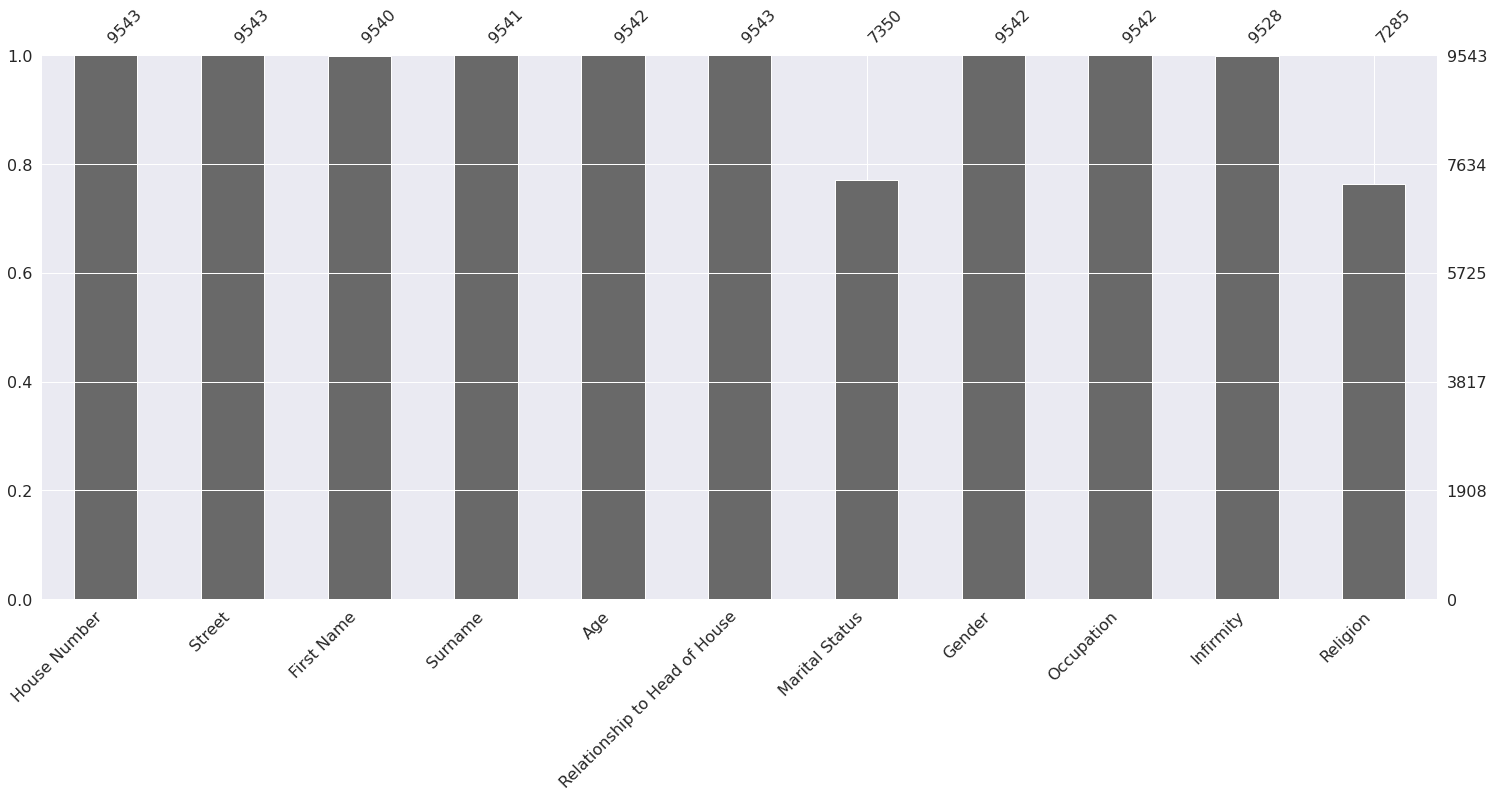

In [ ]:
msno.bar(df_census)

In [ ]:
def composition(df_in, feature):
    key = {}
    composed = {}
    for r in df_in[feature]:
        composed[r] = round((df_in[df_in[feature] == r]['Age'].notnull().sum()/9543)*100,2)
    #return composed
    for k, v in composed.items():
        print(f'{k} : {v}%')

## Data Cleaning

#### House Number

In [ ]:
#check unique values
(df_census['House Number'].unique())

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Two', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55',
       '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66',
       '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77',
       '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88',
       '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99',
       '100', '101', '102', '103', '104', '105', '106', '107', '108',
       '109', '110', '111', '112', '113', '114', '115', '116', '117',
       '118', '119', '120', '121', '122', '123', '124', '125', '126',
       '127', '128', '129', '130', '131', '132', '133', '134', '135',
       '136', '137', '138', '139', '140', '141', '142', '143', '1

In [ ]:
df_census['House Number'] = df_census['House Number'].replace(['Two'], '2')

#check unique values again if two has been replaced
(df_census['House Number'].unique())

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

### Cleaning First name

In [ ]:
#check unique values
(df_census['First Name'].unique())

array(['Alice', 'Mitchell', 'Bernard', 'Kieran', 'Amy', 'Raymond',
       'Beverley', 'Brenda', 'Ryan', 'Megan', 'Arthur', 'Lee',
       'Christian', 'Lorraine', 'Stewart', 'Sheila', 'Claire', 'Tom',
       'Alex', 'Jenna', 'Abdul', 'Liam', 'Natalie', 'Ricky', 'Aaron',
       'Steven', 'Valerie', 'Albert', 'Reece', 'Debra', 'Catherine',
       'Paul', 'Irene', 'Nicole', 'Anna', 'Norman', 'Kathryn', 'Carl',
       'Lindsey', 'Gregory', 'Jordan', 'Leslie', 'Sylvia', 'Harry',
       'Yvonne', 'Barbara', 'Ann', 'Conor', 'Garry', 'Joseph', 'William',
       'Lauren', 'Lucy', 'Joe', 'Aimee', 'Billy', 'Charles', 'Naomi',
       'Alison', 'Kevin', 'Geraldine', 'Ronald', 'Hugh', 'Lynne', 'Barry',
       'Shannon', 'Leon', 'Eric', 'Ellie', 'Stephen', 'Leah', 'Paige',
       'Bryan', 'Francesca', 'Anthony', 'Shirley', 'Thomas', 'Kyle',
       'Kenneth', 'Denise', 'Gemma', 'Margaret', 'Carolyn', 'Howard',
       'Linda', 'Damian', 'Helen', 'Rachel', 'Frederick', 'Donald',
       'Lynn', 'Joel', 'E

In [ ]:
#replacing missing values in first name to suffix
#These are females age 3 and 23 which are single
#df_census.iloc[[405, 3677],[3]] = 'Miss'

#This a male age 58 and divorced
#df_census.iloc[[4509],[3]] = 'Mr'

#check unique values again if ' ' has been replaced with no_fname
#(df_census['First Name'].unique())

In [ ]:
#replacing missing values in first name to No_fname

df_census['First Name'] = df_census['First Name'].fillna('No_fname')

#check unique values again if ' ' has been replaced with no_fname
(df_census['First Name'].unique())

array(['Alice', 'Mitchell', 'Bernard', 'Kieran', 'Amy', 'Raymond',
       'Beverley', 'Brenda', 'Ryan', 'Megan', 'Arthur', 'Lee',
       'Christian', 'Lorraine', 'Stewart', 'Sheila', 'Claire', 'Tom',
       'Alex', 'Jenna', 'Abdul', 'Liam', 'Natalie', 'Ricky', 'Aaron',
       'Steven', 'Valerie', 'Albert', 'Reece', 'Debra', 'Catherine',
       'Paul', 'Irene', 'Nicole', 'Anna', 'Norman', 'Kathryn', 'Carl',
       'Lindsey', 'Gregory', 'Jordan', 'Leslie', 'Sylvia', 'Harry',
       'Yvonne', 'Barbara', 'Ann', 'Conor', 'Garry', 'Joseph', 'William',
       'Lauren', 'Lucy', 'Joe', 'Aimee', 'Billy', 'Charles', 'Naomi',
       'Alison', 'Kevin', 'Geraldine', 'Ronald', 'Hugh', 'Lynne', 'Barry',
       'Shannon', 'Leon', 'Eric', 'Ellie', 'Stephen', 'Leah', 'Paige',
       'Bryan', 'Francesca', 'Anthony', 'Shirley', 'Thomas', 'Kyle',
       'Kenneth', 'Denise', 'Gemma', 'Margaret', 'Carolyn', 'Howard',
       'Linda', 'Damian', 'Helen', 'Rachel', 'Frederick', 'Donald',
       'Lynn', 'Joel', 'E

### Cleaning the Surname column

In [ ]:
# Exploring the data of people with blank surname
df_census[df_census["Surname"].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
975,31,Newrywalk Drive,Lindsey,NaN,52,Head,Married,Female,"Sales professional, IT",None,Christian
8265,27,Pilgrim Drive,Ellie,NaN,2,Daughter,NaN,Female,Child,None,NaN


In [ ]:
#Expanding the dataframe to see the information of the other household members of the records with blanks
df_census[973:8267]
#using the information of other people in the household the surnames were replaced appropriately

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
973,29,Newrywalk Drive,Pamela,Johnson,8,Daughter,NaN,Female,Student,None,NaN
974,30,Newrywalk Drive,Brian,Hughes,56,Head,Single,Male,Diplomatic Services operational officer,None,Christian
975,31,Newrywalk Drive,Lindsey,NaN,52,Head,Married,Female,"Sales professional, IT",None,Christian
976,31,Newrywalk Drive,Wayne,Williams,56,Husband,Married,Male,Training and development officer,None,Christian
977,31,Newrywalk Drive,Anne,Williams,16,Daughter,NaN,Female,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8262,26,Pilgrim Drive,Colin,Webster,3,Son,NaN,Male,Child,None,NaN
8263,27,Pilgrim Drive,Howard,Hughes,43,Head,Married,Male,Radio broadcast assistant,None,Christian
8264,27,Pilgrim Drive,Susan,Hughes,38,Wife,Married,Female,Bonds trader,None,None
8265,27,Pilgrim Drive,Ellie,NaN,2,Daughter,NaN,Female,Child,None,NaN


In [ ]:
# replacing the missing surnames using the information from others in the same household
df_census.loc[[975, 8265],"Surname"] = ["Williams", "Hughes"]
df_census[973:8267] #checking to confirm the blanks have been replaced

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
973,29,Newrywalk Drive,Pamela,Johnson,8,Daughter,NaN,Female,Student,None,NaN
974,30,Newrywalk Drive,Brian,Hughes,56,Head,Single,Male,Diplomatic Services operational officer,None,Christian
975,31,Newrywalk Drive,Lindsey,Williams,52,Head,Married,Female,"Sales professional, IT",None,Christian
976,31,Newrywalk Drive,Wayne,Williams,56,Husband,Married,Male,Training and development officer,None,Christian
977,31,Newrywalk Drive,Anne,Williams,16,Daughter,NaN,Female,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8262,26,Pilgrim Drive,Colin,Webster,3,Son,NaN,Male,Child,None,NaN
8263,27,Pilgrim Drive,Howard,Hughes,43,Head,Married,Male,Radio broadcast assistant,None,Christian
8264,27,Pilgrim Drive,Susan,Hughes,38,Wife,Married,Female,Bonds trader,None,None
8265,27,Pilgrim Drive,Ellie,Hughes,2,Daughter,NaN,Female,Child,None,NaN


### Cleaning the Age column

In [ ]:
(df_census['Age'].unique())

array(['52', '59', '14', '13', '41', '43', '12', '76', '78', '48', '20',
       '16', '8', '39', '6', '1', '65', '66', '29', '26', '73', '38',
       '31', '34', '3', '0', '60', '62', '25', '22', '18', '56', '53',
       '19', '75', '36', '42', '35', '23', '49', '27', '89', '86', '11',
       '54', '24', '44', '45', '51', '55', '47', '21', '57', '68', '72',
       '40', '33', '30', '63', '50', '4', '71', '85', '10', '67', '64',
       '32', '2', '9', '5', '61', '15', '17', '7', '58', '81', '74', '77',
       '46', '69', '80', '37', '28', '83', '79', '70', '92', '84', '93',
       '82', '79.77226286', '82.77226286', '87', '103', '95', '106', '88',
       '100', '91', '90.6967748', '96', '105', '94', '102', '104', '108',
       '90', 'twenty eight', '107', '98', nan, '80.58881184', '97',
       '62.70684789', '61.70684789', '71.43034858', '72.43034858'],
      dtype=object)

In [ ]:
# Exploring the data of people with blank age
df_census[df_census["Age"].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6487,227,White Branch,Reece,Riley,NaN,Son,NaN,Male,Child,None,NaN


In [ ]:
#Expanding the dataframe to see the information of the other household members of the records with blanks
df_census[6485:6490]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6485,227,White Branch,Olivia,Riley,36,Head,Married,Female,Statistician,None,None
6486,227,White Branch,Clive,Riley,33,Husband,Married,Male,Historic buildings inspector/conservation officer,None,None
6487,227,White Branch,Reece,Riley,NaN,Son,NaN,Male,Child,None,NaN
6488,228,White Branch,Gerald,Craig,29,Head,Single,Male,Chartered accountant,None,None
6489,229,White Branch,Frank,Edwards,62,Head,Single,Male,Print production planner,None,Catholic


In [ ]:
#change str 'twenty-eight' to 28
df_census['Age'] = df_census['Age'].replace(['twenty eight'], '28')
df_census['Age'].unique()

array(['52', '59', '14', '13', '41', '43', '12', '76', '78', '48', '20',
       '16', '8', '39', '6', '1', '65', '66', '29', '26', '73', '38',
       '31', '34', '3', '0', '60', '62', '25', '22', '18', '56', '53',
       '19', '75', '36', '42', '35', '23', '49', '27', '89', '86', '11',
       '54', '24', '44', '45', '51', '55', '47', '21', '57', '68', '72',
       '40', '33', '30', '63', '50', '4', '71', '85', '10', '67', '64',
       '32', '2', '9', '5', '61', '15', '17', '7', '58', '81', '74', '77',
       '46', '69', '80', '37', '28', '83', '79', '70', '92', '84', '93',
       '82', '79.77226286', '82.77226286', '87', '103', '95', '106', '88',
       '100', '91', '90.6967748', '96', '105', '94', '102', '104', '108',
       '90', '107', '98', nan, '80.58881184', '97', '62.70684789',
       '61.70684789', '71.43034858', '72.43034858'], dtype=object)

In [ ]:
# converting 'Age' from str to float
df_census['Age'] = df_census['Age'].astype(float)

In [ ]:
#checking for the age mode of those who are declared as a child
df_census[(df_census['Age'] <= 17)]['Age'].value_counts().sort_index() #the mode of this age group will be used to replace the missing value

0.0      85
1.0      91
2.0     102
3.0     111
4.0     127
5.0     126
6.0     137
7.0     132
8.0     119
9.0     116
10.0    105
11.0    142
12.0    126
13.0    118
14.0    132
15.0    134
16.0    145
17.0    146
Name: Age, dtype: int64

In [ ]:
#replace missing value with mode of those with age <=17

#why?: Marital status is NA(NA's has been declared as minors in the relationship column)
#why?: Occupation is declared as child and those below age 17
df_census.iloc[[6487],[4]] = 17

In [ ]:
# converting 'Age' from float to int
df_census['Age'] = df_census['Age'].astype(int)

#check unique values again
(df_census['Age'].unique())

array([ 52,  59,  14,  13,  41,  43,  12,  76,  78,  48,  20,  16,   8,
        39,   6,   1,  65,  66,  29,  26,  73,  38,  31,  34,   3,   0,
        60,  62,  25,  22,  18,  56,  53,  19,  75,  36,  42,  35,  23,
        49,  27,  89,  86,  11,  54,  24,  44,  45,  51,  55,  47,  21,
        57,  68,  72,  40,  33,  30,  63,  50,   4,  71,  85,  10,  67,
        64,  32,   2,   9,   5,  61,  15,  17,   7,  58,  81,  74,  77,
        46,  69,  80,  37,  28,  83,  79,  70,  92,  84,  93,  82,  87,
       103,  95, 106,  88, 100,  91,  90,  96, 105,  94, 102, 104, 108,
       107,  98,  97])

In [ ]:
age_mode = df_census["Age"].mode()
age_mean = df_census["Age"].mean()
age_median = df_census["Age"].median()
age_sd = df_census["Age"].std()
print(f" The mode of the age data is : {age_mode[0]} years \n median of age data series: {int(round(age_median,0))} years \n mean of age data series: {int(round(age_mean,0))} years \n The standard deviation of the age data series is: {int(round(age_sd,0))}")

 The mode of the age data is : 19 years 
 median of age data series: 35 years 
 mean of age data series: 36 years 
 The standard deviation of the age data series is: 22


In [ ]:
#age reclassifcation
df_census['Age group'] = df_census['Age']
df_census.loc[df_census['Age'] <=17, 'Age group'] = 'Child'
df_census.loc[(df_census['Age'] >=18) & (df_census['Age'] <65), 'Age group'] = 'Adult'
df_census.loc[df_census['Age'] >=65, 'Age group'] = 'Senior'
(df_census['Age group'].value_counts())

Adult     6356
Child     2195
Senior     992
Name: Age group, dtype: int64

In [ ]:
#0<=5<=10print(df_census['Gender'].unique())print(df_census['Gender'].unique())print(df_census['Gender'].unique())

### Relationship to HOH

In [ ]:
(df_census['Relationship to Head of House'].unique())

array(['Head', 'Husband', 'Son', 'Daughter', 'Visitor', 'Wife', 'Cousin',
       'None', 'Partner', 'Granddaughter', 'Lodger', 'Nephew', 'Sibling',
       'Neice', 'Grandson', 'Adopted Son', 'Adopted Daughter', 'Step-Son',
       'Step-Daughter', 'Adopted Grandson', 'Adopted Granddaughter'],
      dtype=object)

In [ ]:
df_census[1266:8352]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age group
1266,11,Outer Avenue,Karen,Jones,25,None,Single,Female,PhD Student,None,None,Adult
1267,12,Outer Avenue,Laura,Thompson,17,Head,Divorced,female,Student,None,NaN,Child
1268,12,Outer Avenue,Julian,Thompson,0,Son,NaN,m,Child,None,NaN,Child
1269,12,Outer Avenue,Graham,Dixon,31,Lodger,Single,Male,Event organiser,None,None,Adult
1270,13,Outer Avenue,Glenn,Thomson,54,Head,Single,Male,Bookseller,None,Christian,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
8347,36,Badger Shoal,Leanne,Hall,57,Head,Single,Female,Unemployed,None,Christian,Adult
8348,36,Badger Shoal,Howard,Hall,23,Son,Single,Male,Mining engineer,None,Christian,Adult
8349,37,Badger Shoal,Amber,Ball,17,Head,Single,Female,Student,None,NaN,Child
8350,37,Badger Shoal,Shannon,Ball,1,Daughter,NaN,Female,Child,None,NaN,Child


In [ ]:
hoh_relationship = df_census['Age'].mode()
print(hoh_relationship)

0    19
dtype: int64


In [ ]:
#change str 'Neice' to 'Niece'
df_census['Relationship to Head of House'] = df_census['Relationship to Head of House'].replace(['Neice'], 'Niece')

#hoh_relationship = df_census['Relationship to Head of House'].mode()
#print(hoh_relationship)

#HOH with ages <18, adjusting their age using age mode
#Divorced female living in outer avenue with a son age 0
df_census.iloc[[1267],[4]] = age_mode

#Single female living in Bage Shaol Amber with a daughter age 1
df_census.iloc[[8349],[4]] = age_mode

#check unique values again
print(df_census['Relationship to Head of House'].unique())

['Head' 'Husband' 'Son' 'Daughter' 'Visitor' 'Wife' 'Cousin' 'None'
 'Partner' 'Granddaughter' 'Lodger' 'Nephew' 'Sibling' 'Niece' 'Grandson'
 'Adopted Son' 'Adopted Daughter' 'Step-Son' 'Step-Daughter'
 'Adopted Grandson' 'Adopted Granddaughter']


In [ ]:
composition(df_census, "Relationship to Head of House")

Head : 35.02%
Husband : 9.94%
Son : 16.95%
Daughter : 16.46%
Visitor : 0.29%
Wife : 3.49%
Cousin : 0.34%
None : 7.48%
Partner : 2.54%
Granddaughter : 0.88%
Lodger : 4.41%
Nephew : 0.09%
Sibling : 0.53%
Niece : 0.07%
Grandson : 0.83%
Adopted Son : 0.15%
Adopted Daughter : 0.14%
Step-Son : 0.16%
Step-Daughter : 0.19%
Adopted Grandson : 0.02%
Adopted Granddaughter : 0.01%


### Marital Status

In [ ]:
#check for unique values for marital status
(df_census['Marital Status'].unique())

array(['Married', nan, 'Widowed', 'Single', 'Divorced', 'S', 'D', 'M',
       'W'], dtype=object)

In [ ]:
# Exploring the data of people with blank marital status for
df_census[8711:8715]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age group
8711,14,Spencer Avenue,Stephen,Jennings,23,Son,Single,Male,Chief Marketing Officer,None,Catholic,Adult
8712,14,Spencer Avenue,Leon,Jennings,17,Son,NaN,Male,Student,None,NaN,Child
8713,15,Spencer Avenue,Mary,Brooks,58,Head,Single,NaN,Unemployed,None,Christian,Adult
8714,15,Spencer Avenue,Tony,Brooks,41,Son,Single,Male,Rural practice surveyor,None,Christian,Adult


In [ ]:
#replace 'S','D','M' and 'W' with the right values
df_census['Marital Status'] = df_census['Marital Status'].replace(['S'], 'Single')
df_census['Marital Status'] = df_census['Marital Status'].replace(['D'], 'Divorced')
df_census['Marital Status'] = df_census['Marital Status'].replace(['M'], 'Married')
df_census['Marital Status'] = df_census['Marital Status'].replace(['W'], 'Widowed')

#replacing nan in marital status with mode value of MS
#ms_mode = df_census['Marital Status'].mode()
#ms_mode
df_census[['Marital Status']] = df_census[['Marital Status']].fillna('None')
#all the records in MS with NA have their ages below age 18, makes sense to fill the blanks with none as provided in the question 

#check for unique values again in marital status after replacing
(df_census['Marital Status'].unique())

array(['Married', 'None', 'Widowed', 'Single', 'Divorced'], dtype=object)

### Cleaning the Gender column

In [ ]:
##df_census[(df_census['Occu']<18)]['Age'].value_counts() #.sort_index()

In [ ]:
# Exploring the data of people with blank gender
df_census[df_census["Gender"].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age group
8713,15,Spencer Avenue,Mary,Brooks,58,Head,Single,NaN,Unemployed,None,Christian,Adult


In [ ]:
df_census[8712:8716]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age group
8712,14,Spencer Avenue,Leon,Jennings,17,Son,None,Male,Student,None,NaN,Child
8713,15,Spencer Avenue,Mary,Brooks,58,Head,Single,NaN,Unemployed,None,Christian,Adult
8714,15,Spencer Avenue,Tony,Brooks,41,Son,Single,Male,Rural practice surveyor,None,Christian,Adult
8715,16,Spencer Avenue,Jemma,Crawford,61,Head,Married,Female,Financial trader,None,None,Adult


In [ ]:
#check for unique values
print(df_census['Gender'].unique())

['Female' 'Male' 'M' 'male' 'F' 'female' 'f' 'm' nan]


In [ ]:
#replace 'S','D','M' and 'W' with the right values
df_census['Gender'] = df_census['Gender'].replace(['M'], 'Male')
df_census['Gender'] = df_census['Gender'].replace(['male'], 'Male')
df_census['Gender'] = df_census['Gender'].replace(['F'], 'Female')
df_census['Gender'] = df_census['Gender'].replace(['female'], 'Female')
df_census['Gender'] = df_census['Gender'].replace(['f'], 'Female')
df_census['Gender'] = df_census['Gender'].replace(['m'], 'Male')

In [ ]:
#replacing nan with mode
#why: first name is Mary which indicates as female
#why: the mode for gender is also female. Replaced using the mode
gender_mode = df_census['Gender'].mode()
gender_mode

df_census['Gender'] = df_census['Gender'].fillna(df_census['Gender'].mode()[0])

print(df_census['Gender'].unique())

['Female' 'Male']


### Cleaning Occupation Column

In [ ]:
#check for unique values
print(df_census['Occupation'].unique())

(df_census['Occupation'].value_counts())

#replace the missing value with mode
occupation_mode = df_census['Occupation'].mode()
occupation_mode
df_census['Occupation'] = df_census['Occupation'].fillna(df_census['Occupation'].mode()[0])

['Microbiologist' 'Homeopath' 'Student' ... 'Retired Contractor'
 'Retired Emergency planning/management officer'
 'Retired Psychologist, prison and probation services']


In [ ]:
#recatogrizing occupation

#retirement condition
retirement_cond = df_census['Occupation'].str.lower().str.contains('retired')

#either a student of any kind, unemployed OR a child ['student | unemployed | child']
unemp_cond = (df_census['Occupation'].str.lower().str.contains('student|unemployed')) | (df_census['Occupation'].str.lower() == 'child')

df_census.loc[retirement_cond, 'Employment Status'] = 'Retired'
df_census.loc[(~retirement_cond)  & (unemp_cond), 'Employment Status'] = 'Unemployed'
df_census.loc[(~retirement_cond)  & (~unemp_cond), 'Employment Status'] = 'Employed'


#### Infirmity

In [ ]:
#check for unique values for infirmity
(df_census['Infirmity'].unique())
#(df_census['Infirmity'].value_counts())

array(['None', 'Mental Disability', 'Physical Disability',
       'Unknown Infection', nan, 'Blind', 'Deaf', 'Disabled'],
      dtype=object)

In [ ]:
# Exploring the data of people with blank infrimity status
df_census[df_census["Infirmity"].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age group,Employment Status
559,19,Bumblebee Lane,Guy,Wallis,43,Husband,Married,Male,Licensed conveyancer,NaN,Catholic,Adult,Employed
1088,19,Salmon Street,Kim,Gould,15,Daughter,None,Female,Student,NaN,NaN,Child,Unemployed
1468,28,Keeper Street,Benjamin,Hale,3,Son,None,Male,Child,NaN,NaN,Child,Unemployed
3383,25,Tamarisk Pines,Pamela,Knowles,62,Lodger,Single,Female,Garment/textile technologist,NaN,Christian,Adult,Employed
4376,19,Sutton Drive,Jemma,Johnston,44,Head,Single,Female,Ophthalmologist,NaN,None,Adult,Employed
5756,16,Elyarch Drive,Frederick,Gilbert,75,Husband,Married,Male,Retired Oncologist,NaN,None,Senior,Retired
6355,145,White Branch,Paige,Price,6,Daughter,None,Female,Student,NaN,NaN,Child,Unemployed
6411,179,White Branch,Patrick,Greenwood,34,Head,Single,Male,Art therapist,NaN,None,Adult,Employed
6900,2,Gray Ways,Donna,Turnbull,7,Daughter,None,Female,Student,NaN,NaN,Child,Unemployed
7126,22,Anvil Street,Duncan,Oliver,25,Son,Single,Male,Occupational therapist,NaN,Christian,Adult,Employed


In [ ]:
# count all values in Infirmity column
(df_census['Infirmity'].value_counts())

infirmity_mode = df_census['Infirmity'].mode()
infirmity_mode

#replace blanks with mode. 16 records affected. Does this skew the data in anyway?
df_census['Infirmity'] = df_census['Infirmity'].fillna(df_census['Infirmity'].mode()[0])

#recategorizing mental disability, physical disability, ...... as disabled except none
#df_census['Religion'] = df_census['Religion'].replace(['Mental Disability', 'Physical Disability','Unknown Infection', 'Blind', 'Deaf'], 'Disabled')
#df_census['Religion'] = df_census['Religion'].replace(['None],'Non-disabled')

#check for unique values again in infirmity after replacing
(df_census['Infirmity'].unique())

array(['None', 'Mental Disability', 'Physical Disability',
       'Unknown Infection', 'Blind', 'Deaf', 'Disabled'], dtype=object)

In [ ]:
#recategorizing infirmity status to disabled and non-disabled
df_census.loc[df_census['Infirmity'] == 'None', 'Infirmity Status'] = 'Non-disabled'
df_census.loc[df_census['Infirmity'] != 'None', 'Infirmity Status'] = 'Disabled'

#confirm variable name replacement
(df_census['Infirmity Status'].unique())
(df_census['Infirmity Status'].value_counts())

Non-disabled    9480
Disabled          63
Name: Infirmity Status, dtype: int64

### Cleaning Religion column

In [ ]:
# count all unique values in Religion column
(df_census['Religion'].value_counts())

#(df_census['Religion'].unique())#getting the unique values

#check religion mode before replacing nan
#religion_mode = df_census['Religion'].mode()
#religion_mode

None           3170
Christian      2172
Catholic       1043
Methodist       671
Muslim          124
Sikh             56
Jewish           37
Nope              3
Undecided         2
Orthodoxy         2
Agnostic          2
Jedi              1
Pagan             1
Housekeeper       1
Name: Religion, dtype: int64

In [ ]:
#replacing nan with mode
df_census['Religion'] = df_census['Religion'].fillna(df_census['Religion'].mode()[0])

#replacing Housekeeper, Nope... etc with None
df_census['Religion'] = df_census['Religion'].replace(['Housekeeper', 'Nope', 'Undecided', 'Pagan'], 'None')

print(df_census['Religion'].unique())

['None' 'Christian' 'Catholic' 'Muslim' 'Methodist' 'Jewish' 'Sikh' 'Jedi'
 'Orthodoxy' 'Agnostic']


In [ ]:
#recategorizing Religion status to Religious and Non-Religious
df_census.loc[df_census['Religion'] == 'None', 'Religion Status'] = False
df_census.loc[df_census['Religion'] != 'None', 'Religion Status'] = True

df_census['Religion Status'] = df_census['Religion Status'].replace([False], 'Non-religious')
df_census['Religion Status'] = df_census['Religion Status'].replace([True], 'Religious')
#check for unique values again in religion after replacing
(df_census['Religion Status'].unique())

array(['Non-religious', 'Religious'], dtype=object)

In [ ]:
#checking if we have no blanks again the dataset
df_census.info()
df_census.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9543 entries, 0 to 9542
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   9543 non-null   object
 1   Street                         9543 non-null   object
 2   First Name                     9543 non-null   object
 3   Surname                        9543 non-null   object
 4   Age                            9543 non-null   int64 
 5   Relationship to Head of House  9543 non-null   object
 6   Marital Status                 9543 non-null   object
 7   Gender                         9543 non-null   object
 8   Occupation                     9543 non-null   object
 9   Infirmity                      9543 non-null   object
 10  Religion                       9543 non-null   object
 11  Age group                      9543 non-null   object
 12  Employment Status              9543 non-null   object
 13  Inf

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
Age group                        0
Employment Status                0
Infirmity Status                 0
Religion Status                  0
dtype: int64

### Early Analysis after Data Cleaning

#### Descriptive analysis for all variables

In [ ]:
df_census.describe(include = 'all')

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age group,Employment Status,Infirmity Status,Religion Status
count,9543,9543,9543,9543,9543.000000,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543
unique,244,104,366,690,NaN,21,5,2,1106,7,10,3,3,2,2
top,1,Canary Avenue,Barbara,Smith,NaN,Head,Single,Female,Student,None,None,Adult,Employed,Non-disabled,Non-religious
freq,350,798,42,285,NaN,3342,3456,4981,1797,9480,5435,6356,5153,9480,5435
mean,NaN,NaN,NaN,NaN,35.920046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,21.524661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,51.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_census['Age'].describe()

count    9543.000000
mean       35.920046
std        21.524661
min         0.000000
25%        19.000000
50%        35.000000
75%        51.000000
max       108.000000
Name: Age, dtype: float64

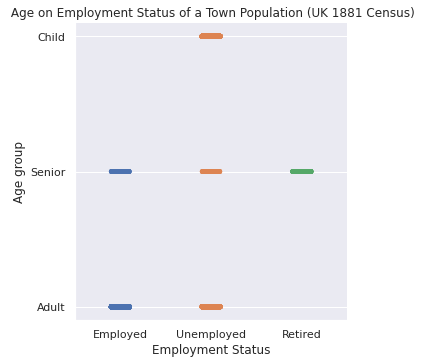

In [ ]:
sns.catplot(data=df_census, y="Age group", x="Employment Status").set(title = ' Age on Employment Status of a Town Population (UK 1881 Census)')

In [ ]:
(df_census.mode())

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age group,Employment Status,Infirmity Status,Religion Status
0,1,Canary Avenue,Barbara,Smith,19,Head,Single,Female,Student,None,None,Adult,Employed,Non-disabled,Non-religious


#### Street

In [ ]:
#calculate counts of value for Street
print(df_census['Street'].value_counts())

#calculate proportion of street
print(df_census['Street'].value_counts()/df_census['Street'].value_counts().sum()*100)

Canary Avenue        798
Haymarket Drive      518
White Branch         375
Hughes Lane          343
Walker Station       329
                    ... 
Johnson Abbey          5
Brass Factory          5
Walker Lighthouse      1
Singh Cabin            1
Inverness Delve        1
Name: Street, Length: 104, dtype: int64
Canary Avenue        8.362150
Haymarket Drive      5.428062
White Branch         3.929582
Hughes Lane          3.594258
Walker Station       3.447553
                       ...   
Johnson Abbey        0.052394
Brass Factory        0.052394
Walker Lighthouse    0.010479
Singh Cabin          0.010479
Inverness Delve      0.010479
Name: Street, Length: 104, dtype: float64


#### Age

[Text(0.5, 1.0, 'Age Distribution of a Town (UK 1881 Census)')]

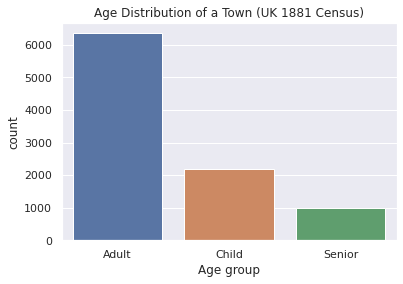

In [ ]:
#age outlier
sns.countplot(data=df_census, x='Age group').set(title = 'Age Distribution of a Town (UK 1881 Census)' )

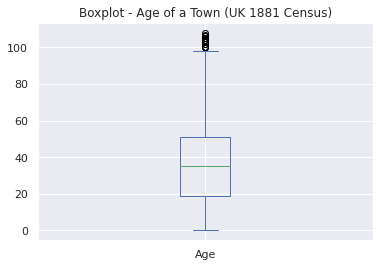

In [ ]:
#boxplot of age 
df_census.plot(y="Age", kind="box", title="Boxplot - Age of a Town (UK 1881 Census)")

#A boxplot shows the summary statistics of a continuous variable.

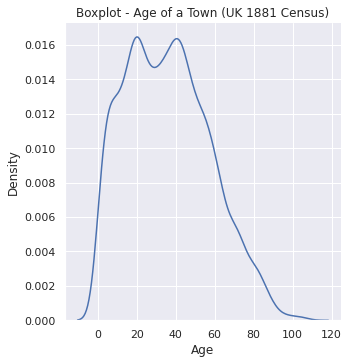

In [ ]:
#Kernel Density Estimation Curve of Age
sns.displot(df_census, x="Age", kind="kde").set(title="Boxplot - Age of a Town (UK 1881 Census)")

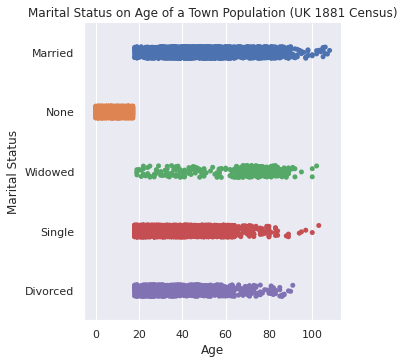

In [ ]:
#age vs Marital Status
sns.catplot(data=df_census, x="Age", y="Marital Status").set(title = 'Marital Status on Age of a Town Population (UK 1881 Census)')

In [ ]:
#Age conditioned on Marital Status
Age_marstat_plot = sns.displot(data=df_census, x = 'Age', hue='Marital Status', edgecolor='white', multiple='stack') 
Age_marstat_plot.set(title= 'Age Distribution on Marital Status')
Age_marstat_plot.set_axis_labels("Age (in Years)", "Count")

In [ ]:
composition(df_census, 'Age')

In [ ]:
composition(df_census, 'Marital Status')

In [ ]:
ageOutliers = df_census.loc[df_census['Age'] > 100]
ageOutliers

### Relationship to HOH

In [ ]:
print(df_census['Relationship to Head of House'].mode())

df_census['Relationship to Head of House'].value_counts().plot(kind="bar",
                           title="Relationship to Head of House of a Town (UK 1881 Census)",
                           #rot=15,
                           xlabel="Relationship Type",
                           ylabel="Count")

#### Marital status

In [ ]:
print(df_census['Marital Status'].mode())

#df_census['Marital Status'].value_counts().plot(kind="bar",
                           #title="Marital status Distribution",
                           #rot=15,
                           #xlabel="Marital Status",
                           #ylabel="Count")
sns.set_style("dark")
sns.catplot(data=df_census, x="Marital Status", kind="count", palette="ch:.30").set(title = 'Marital Status Distribution of a Town (UK 1881 Census) ')

#### Gender

In [ ]:
print(df_census['Gender'].mode())

sns.catplot(data=df_census, x="Gender", kind="count", palette="pastel").set(title='Gender Distribution of a Town (UK 1881 Census)')

In [ ]:
sns.histplot(df_census, x="Gender", shrink=.8, hue='Marital Status').set(title='Composition of Marital Status on Gender in Town (1881 UK Census)')

In [ ]:
# Gender against age conditioned on Marital Status
g = sns.catplot(y='Age', hue="Marital Status", x="Gender",
                data=df_census, saturation=.6, dodge=True, ci=None,kind="bar")
g.set(title="Histogram of Gender on  Age of the Town's Population Conditioned on Marital Status")

In [ ]:
(df_census['Infirmity'].mode())

#sns.catplot(data=df_census, x="Infirmity", kind="count", palette="muted")

df_census['Infirmity Status'].value_counts().plot(kind="bar",
                           title="Infirmity Distribution of a Town (UK 1881 Census)",
                           #rot=15,
                           xlabel="Infirmity Type",
                           ylabel="Count")

In [ ]:
print(df_census['Religion'].mode())

sns.histplot(data=df_census, x="Religion", palette="muted", legend='auto').set(title='Religion Distribution of a Town (UK 1881 Census)')

## **Data Analysis and Insights**

#### Age Distribution: Population Pyramid

In [ ]:
#create age group using five-year age gap

df_census.loc[(df_census['Age'] >=0) & (df_census['Age'] <=4), 'Age_group'] = '0-4'
df_census.loc[(df_census['Age'] >=5) & (df_census['Age'] <=9), 'Age_group'] = '5-9'
df_census.loc[(df_census['Age'] >=10) & (df_census['Age'] <=14), 'Age_group'] = '10-14'
df_census.loc[(df_census['Age'] >=15) & (df_census['Age'] <=19), 'Age_group'] = '15-19'
df_census.loc[(df_census['Age'] >=20) & (df_census['Age'] <=24), 'Age_group'] = '20-24'
df_census.loc[(df_census['Age'] >=25) & (df_census['Age'] <=29), 'Age_group'] = '25-29'
df_census.loc[(df_census['Age'] >=30) & (df_census['Age'] <=34), 'Age_group'] = '30-34'
df_census.loc[(df_census['Age'] >=35) & (df_census['Age'] <=39), 'Age_group'] = '35-39'
df_census.loc[(df_census['Age'] >=40) & (df_census['Age'] <=44), 'Age_group'] = '40-44'
df_census.loc[(df_census['Age'] >=45) & (df_census['Age'] <=49), 'Age_group'] = '45-49'
df_census.loc[(df_census['Age'] >=50) & (df_census['Age'] <=54), 'Age_group'] = '50-54'
df_census.loc[(df_census['Age'] >=55) & (df_census['Age'] <=59), 'Age_group'] = '55-59'
df_census.loc[(df_census['Age'] >=60) & (df_census['Age'] <=64), 'Age_group'] = '60-64'
df_census.loc[(df_census['Age'] >=65) & (df_census['Age'] <=69), 'Age_group'] = '65-69'
df_census.loc[(df_census['Age'] >=70) & (df_census['Age'] <=74), 'Age_group'] = '70-74'
df_census.loc[(df_census['Age'] >=75) & (df_census['Age'] <=79), 'Age_group'] = '75-79'
df_census.loc[(df_census['Age'] >=80) & (df_census['Age'] <=84), 'Age_group'] = '80-84'
df_census.loc[(df_census['Age'] >=85) & (df_census['Age'] <=89), 'Age_group'] = '85-89'
df_census.loc[(df_census['Age'] >=90) & (df_census['Age'] <=94), 'Age_group'] = '90-94'
df_census.loc[(df_census['Age'] >=95) & (df_census['Age'] <=99), 'Age_group'] = '95-99'
df_census.loc[(df_census['Age'] >=100),'Age_group'] = '100+'


sortindex = ['100+','95-99','90-94','85-89','80-84','75-79','70-74','65-69',
        '60-64','55-59','50-54','45-49','40-44','35-39','30-34','25-29',
        '20-24','15-19','10-14','5-9','0-4']
#split Gender
female_g=df_census['Gender'] == 'Female'
F = df_census[female_g]['Age_group']
F_only = F.value_counts() #.sort_index()
F_only = pd.DataFrame({'Age Group':F_only.index, 'count':F_only.values}) #, index = sortindex)

Male_g=df_census['Gender'] == 'Male'
M = df_census[Male_g]['Age_group']
M_only = M.value_counts()#.sort_index()
M_only = pd.DataFrame({'Age Group':M_only.index, 'count':M_only.values}) #, index = sortindex )


#age_m = pd.DataFrame({'Age_group': M_only.index, 'Frequency':M_only.values}, index = sortindex)
#age_f = pd.DataFrame({'Age_group': F_only.index, 'Frequency':F_only.values}, index= sortindex)
#y = df_census['Age_group']

#print(F_only)
#print(M_only)
M_only['count'] *= -1

census_bar_plot = sns.barplot(y=F_only['Age Group'], x=F_only['count'], data=F_only, order=sortindex, lw=0, palette='YlOrBr')
census_bar_plot = sns.barplot(y=M_only['Age Group'], x=M_only['count'], data=M_only, order=sortindex, lw=0, palette='ch:start=.2,rot=-.3')
census_bar_plot.set(xlabel="Population (hundreds)", ylabel="Age-Group", title = "Population Pyramid of a Town(1881 UK Census)")
census_bar_plot.legend()

#df_census[['Age', 'Age_group']].sort_values(by='Age')
#df_census[df_census['Age_group'].isnull()== False]

In [ ]:
#population statistics

age5_14 =  df_census.loc[(df_census["Age"] >= 5) & (df_census['Age'] < 15)]
age5_14_total= age5_14["Age"].notnull().sum()

age55_64 = df_census.loc[(df_census["Age"] >= 55) & (df_census['Age'] < 64)]
age55_64_total= age5_14["Age"].notnull().sum()

DLPI = age5_14_total / age55_64_total
DLPI

Birth Rate and Death Rate per 1000 in the population



In [ ]:
#calculating the total population of the town
total_pop_count = df_census["Gender"].count()
total_pop_count

pop_per_th = 1000/total_pop_count
pop_per_th

# number of newborns
age0_child = df_census[(df_census["Age"] <1)]
age0_count = age0_child["Age"].notnull().sum()
#children_age0["Age"].value_counts()
#children_age0.head(5)

# number of children of age "4"
age4_child = df_census[(df_census["Age"] == 4)] #& (df_census["Age"] < 5)]
age4_count = age4_child["Age"].notnull().sum()

In [ ]:
# Calculating the number of women between the age of "25" and "29"
female_25_29 = df_census[(df_census["Gender"] == "Female") &
                  (df_census["Age"] > 24) &
                  (df_census["Age"] < 30)]

female_25_29_count = female_25_29["Age"].notnull().sum()

# Calculating the number of women between the age of "30" and "34"
female_30_34 = df_census[(df_census["Gender"] == "Female") &
                  (df_census["Age"] > 29) &
                  (df_census["Age"] < 35)]

female_30_34_count = female_30_34["Age"].notnull().sum()

print(female_25_29_count)
print(female_30_34_count)
print(age4_count)
print(age0_count)

In [ ]:
#birth rate for age0
first_br = age0_count*pop_per_th
round(first_br,2)
first_br

#birth rate for age4
second_br = age4_count*pop_per_th
round(second_br,2)

birth_rate = second_br - first_br
birth_rate = round(birth_rate,2)

print(f"The birth rate for the town per thousand is : {birth_rate}")
print(first_br)
print(second_br)

Calculating the death rate per 1000 from age 65 & above









In [ ]:
#function to give count of specific age group

def age_group_population(df, age_g):
  age_groups = {}
  for age_group in df['Age_group']:
    age_groups[age_group] = 'n/a'
  population = {}
  for age in age_groups.keys():
    if age == age_g:
      population[age] = df[df['Age_group'] == age]['Age'].count()
  return population[age_g]

In [ ]:
persons_aged_65_69_count = age_group_population(df_census, '65-69')
persons_aged_70_74_count = age_group_population(df_census, '70-74')
persons_aged_75_79_count = age_group_population(df_census, '75-79')
persons_aged_80_84_count = age_group_population(df_census, '80-84')
persons_aged_85_89_count = age_group_population(df_census, '85-89')
persons_aged_90_94_count = age_group_population(df_census, '90-94')
persons_aged_95_99_count = age_group_population(df_census, '95-99')
persons_aged_100_above_count = age_group_population(df_census, '100+')

#calculating death rate for the age groups 65 and above per hundred thousand
deathrate_65_74_th = ((persons_aged_65_69_count - persons_aged_70_74_count) / 5)*pop_per_th
deathrate_70_79_th = ((persons_aged_70_74_count - persons_aged_75_79_count) / 5)*pop_per_th
deathrate_75_84_th = ((persons_aged_75_79_count - persons_aged_80_84_count) / 5)*pop_per_th
deathrate_80_89_th = ((persons_aged_80_84_count - persons_aged_85_89_count) / 5)*pop_per_th
deathrate_85_94_th = ((persons_aged_85_89_count - persons_aged_90_94_count) / 5)*pop_per_th
deathrate_90_99_th = ((persons_aged_90_94_count - persons_aged_95_99_count) / 5)*pop_per_th
deathrate_95_100_above_th = ((persons_aged_95_99_count - persons_aged_100_above_count) / 5)*pop_per_th

print(deathrate_65_74_th)
print(deathrate_70_79_th)
print(deathrate_75_84_th)
print(deathrate_80_89_th)
print(deathrate_85_94_th)
print(deathrate_90_99_th)
print(deathrate_95_100_above_th)

death_rate = (deathrate_65_74_th + deathrate_70_79_th + deathrate_75_84_th + deathrate_80_89_th + deathrate_85_94_th
                        + deathrate_90_99_th + deathrate_95_100_above_th)

death_rate = round(death_rate,2)
print (f"The total death rate  per hundred thousand is : {death_rate}")

In [ ]:
df_census['Age_group'].value_counts().sort_index()

Population Increasing or Shrinking

In [ ]:
#this gives the growth rate of the population
birth_death_rate_ratio = (round(birth_rate/death_rate,2))
print(f"The birth rate to death ration rate is: {birth_death_rate_ratio}")

natural_increase = ((birth_rate - death_rate) /10)*100
natural_increase

print(f"the birth rate and death rate per 1000 is: {natural_increase}, with a ratio of {birth_death_rate_ratio}")

doubling_time = 70/natural_increase
doubling_time
print(f"It will take the town {round(doubling_time,0)} years to double its current size")


Doubling Time

In [ ]:
doubling_time = 70/natural_increase
doubling_time

Housing Occupancy & Density

In [ ]:
# Household Heads dataframe
household_head = df_census[df_census["Relationship to Head of House"]== "Head"]
#household_head

In [ ]:
# Calculating the number of households and occupancy per household mean

household_head_count = household_head["Relationship to Head of House"].notnull().sum()
print(f"The number of households is: {household_head_count}")

print(f"The population of the town is: {total_pop_count}")

occupancy_per_household = pd.DataFrame()
df_census.groupby(['Street', 'House Number'])['Street'].count()

#Occupancy mean per household
occupancy_per_household["Occupancy Count"] = df_census.groupby(["Street", "House Number"])["Street"].transform("count")

occupancy_mean = occupancy_per_household["Occupancy Count"].mean()
print(f"The mean occupancy per household is {round(occupancy_mean,2)}")

# Calculating the ratio of households to  total population

household_ratio = total_pop_count/household_head_count
print(f"The ratio of households to the total population is = {1}:{int(round(household_ratio,0))}")

df_census["Occupancy Count"] = df_census.groupby(['Street', 'House Number'])['Street'].transform('count')
#df_census

#checking the count of households with occupancy greater than 5
occupancy_check = df_census[df_census["Occupancy Count"] > 5]
occupancy_check = occupancy_check["Occupancy Count"].notnull().sum()
print(f"The total number of households with more than 5 occupants is {occupancy_check}")
occupancy_check_percentage_5 = (occupancy_check/household_head_count) * 100
print(f"The proportion of household with more than 5 occupants is {round(occupancy_check_percentage_5,2)}%")
#occupancy count descriptive statistics
occupancy_count_info = df_census["Occupancy Count"].notnull().sum()
occupancy_count_info

In [ ]:
occupancy_marital = df_census[["House Number", "Street", "Marital Status"] ].drop_duplicates()
occ_single = occupancy_marital[occupancy_marital['Marital Status'] == 'Single'].notnull().sum()
occ_married = occupancy_marital[occupancy_marital['Marital Status'] == 'Married'].notnull().sum()
occ_divorced = occupancy_marital[occupancy_marital['Marital Status'] == 'Divorced'].notnull().sum()
occ_widowed = occupancy_marital[occupancy_marital['Marital Status'] == 'Widowed'].notnull().sum()

#print(occ_single)
#print(occ_married)
#print(occ_divorced)

occ_single_prop = (occ_single/household_head_count)*100
occ_married_prop = (occ_married/household_head_count)*100
occ_divorced_prop = (occ_divorced/household_head_count)*100
occ_widowed_prop = (occ_widowed/household_head_count)*100

print(f"The percentage of household occupied by a single person is {round(occ_single_prop,0)}%")
print(f"The percentage of household occupied by a married person is {round(occ_married_prop,0)}%")
print(f"The percentage of household occupied by a divorced person is {round(occ_divorced_prop,0)}%")
print(f"The percentage of household occupied by a widowed person is {round(occ_widowed_prop,0)}%")


In [ ]:
# Household heads age and number of occupants

hh_head_scatter_plot = plt.figure(figsize=(15,7.5), dpi = 100 )
sns.set_theme()
hh_head_scatter_chart = sns.scatterplot(data = household_head,x ='Age',y=df_census["Occupancy Count"], palette='Set2')
hh_head_scatter_chart.set(xlabel="Household Heads Age", ylabel='Frequency')
plt.title("A Scattter Plot Showing the Distribution of Household Heads Age and Number of People Per Household")
plt.show()

In [ ]:
# Visualising the heads of relationship to head of house DataFrame with a boxplot

head_boxplot = plt.figure(figsize=(15,7.5), dpi = 100 )
sns.set_theme()
head_boxchart = sns.boxplot(data = household_head,x ='Age',  palette='Set2')
head_boxchart.set(xlabel='Age Distribution', ylabel='')
plt.title(' Boxplot Showing Age Concentration for Heads in Relationship to Head of House BOXPLOT SHOWING AGE CONCENTRATION FOR HEADS IN RELATIONSHIP TO HEAD OF HOUSE TO GET AGE CONCENTRATION FOR HOUSEHOLDS ')
plt.show()

Unemployment Trends

In [ ]:
#  unemployed people in the population

unemployed_pop = (df_census.loc[df_census["Occupation"].str.contains("Unemployed", na=False, case=False, regex=True)])

# economically active population: the working age group is 16-64 years
working_age = df_census.loc[(df_census["Age"] >= 16) & (df_census['Age'] < 65)]
working_age

#get the data of employed people only
working_age_data = (working_age.loc[~working_age ["Occupation"].str.contains('Unemployed', na=False, case=False, regex=True)])

#count of those employed and unemployed
working_age_data_count = working_age_data["Occupation"].notnull().sum()
working_age_data_count

unemployed_pop_count = unemployed_pop["Occupation"].notnull().sum()
unemployed_pop_count

# percentage of unemployed to unemployed
employment_ratio = (unemployed_pop_count/working_age_data_count)*100
print(f"The percentage of unemployed population: {round(employment_ratio,2)}%")
print(f"The number of unemployed population: {unemployed_pop_count}")

In [ ]:
working_age

working_age[working_age['Occupation']=='University Student']

In [ ]:
# Visualising the unemployment DataFrame with a histplot

unemployment_plot = plt.figure(figsize=(15,7.5), dpi = 100 )
sns.set_theme()
unemployment_chart = sns.histplot(data = working_age, x ='Age', hue='Employment Status',  binwidth=3, palette='Set2', kde=True, multiple='stack')
unemployment_chart.set(xlabel='Age of Persons Economically Active', ylabel='Frequency')
plt.title('Age Distribution of Unemployed Persons in the Population within the Economically Active Group')
plt.show()


In [ ]:
# Visualising the unemployment DataFrame with boxplot

unemployment_box_plot = plt.figure(figsize=(15,7.5), dpi = 100 )
sns.set_theme()
unemployment_box_chart = sns.boxplot(data = unemployed_pop, x= "Age", palette='Set1')
unemployment_box_chart.set(xlabel='Age Distribution', ylabel='Unemployed Persons')
plt.title('Age Concentration of Unemployed Persons')
plt.show()

Religious Affliations

In [ ]:
# Review of various element count in the Religion data series

df_census["Religion"].value_counts()

In [ ]:
all_religions = plt.figure(figsize=(15,10), dpi = 100 )
religion_chart = sns.countplot(data = df_census,x ='Religion', palette='Set1' )
religion_chart.set_xticklabels(religion_chart.get_xticklabels(), rotation=45, horizontalalignment='right',fontweight='light', fontsize='x-large')
religion_chart.set(xlabel='Type of Religion', ylabel='Frequency')
plt.title('Distribution of Religion in the Population of a Town (1881 UK Census)')
plt.show()

In [ ]:
%matplotlib inline
age_religions = plt.figure(figsize=(15,7.5), dpi = 100 )
sns.set_theme()
age_religion_chart = sns.histplot(data = df_census,x ='Age', hue='Religion', binwidth=5, palette='Set1', multiple="stack" )
age_religion_chart.set(xlabel='Age(years)', ylabel='Frequency')
plt.title('Age Distribution of Religion in the Population of a Town (1881 UK Census)')
plt.show()

Religion on the increase or shrinking

In [ ]:
# Extracting individual religion dataframes
none_religion = df_census[df_census["Religion"] == "None"]
catholic_religion = df_census[df_census["Religion"] == "Catholic"]
christian_religion = df_census[df_census["Religion"] == "Christian"]
muslim_religion = df_census[df_census["Religion"] == "Muslim"]
methodist_religion = df_census[df_census["Religion"] == "Methodist"]
jewish_religion = df_census[df_census["Religion"] == "Jewish"]
sikh_religion = df_census[df_census["Religion"] == "Sikh"]
jedi_religion = df_census[df_census["Religion"] == "Jedi"]
orthodoxy_religion = df_census[df_census["Religion"] == "Orthodoxy"]
agnostic_religion = df_census[df_census["Religion"] == "Agnostic"]

In [ ]:
# Extracting Age data series for individual religions

reli_age_none = none_religion["Age"]
reli_age_christian = christian_religion["Age"]
reli_age_cath = catholic_religion["Age"]
reli_age_muslim = muslim_religion["Age"]
reli_age_method = methodist_religion["Age"]
reli_age_jewish = jewish_religion["Age"]
reli_age_sikh = sikh_religion["Age"] 
reli_age_jedi = jedi_religion["Age"]
reli_age_orthodoxy = orthodoxy_religion["Age"]
reli_age_agnostic = agnostic_religion["Age"]

In [ ]:
# creating a dictionary of each individual religions and their age distribution 

all_religions_age = { "None":reli_age_none,
                           "Christian":reli_age_christian,
                           "Catholic":reli_age_cath,
                          "Muslim":reli_age_muslim,
                          "Methodist":reli_age_method,
                          "Jewish":reli_age_jewish,
                          "Sikh":reli_age_sikh,
                          "Jedi":reli_age_jedi,
                          "Orthodoxy":reli_age_orthodoxy,
                          "Agnostic":reli_age_agnostic,
}

all_religions_age = pd.DataFrame(all_religions_age)
all_religions_age

In [ ]:
# Using the box plot to show age concentration in our religion dataset, spot deviations and outliers 

age_religion_total = plt.figure(figsize=(20,10), dpi = 100 )
age_religion_chart = sns.boxplot(data = all_religions_age, palette='Set1')
age_religion_chart.set(ylabel='Age(years)', xlabel='Religion')
age_religion_chart.set_xticklabels(age_religion_chart.get_xticklabels(), rotation=90, horizontalalignment='right',fontweight='heavy', fontsize='x-large')
plt.title(' Age Concentration of Religion in the Population')
plt.show()

Commuters

In [ ]:
non_commuters_pop = ["shop", "Retired", "supermarket", "baristas", "retail", "restaurant", "pub", "bar","Child","Unemployed","police","teachers", "NHS","Herb","adult", "servant", "government", "health","care", "pharmacist"]

commuters = (df_census.loc[~df_census["Occupation"].str.contains("|".join(non_commuters_pop), case=False, regex=True)])

In [ ]:
#commmuter are assumed to be between age 16-65years as this covers the economically active population

daily_commuters = df_census[(df_census["Age"] >=16) & (df_census["Age"] <= 64)]
#daily_commuters

daily_commuters_count = daily_commuters["Occupation"].count()
daily_commuters_count

In [ ]:
daily_commuters_prop = (daily_commuters_count/total_pop_count) * 100

print(f"The percentage of possible daily commuters is estimated to be: {daily_commuters_prop:.2f}%")

In [ ]:
commuter = pd.DataFrame({'Commute Analysis': ['Total Population', 'Possible Daily Commuters'], 'Count': [total_pop_count, daily_commuters_count]})

CommuteClass = ['Total Population', 'Possible Daily Commuters']
#commute_analysis_plot = plt.figure(figsize=(5,5), dpi = 100 ) 
commute_chart = sns.barplot(x='Commute Analysis', y='Count', data=commuter, order=CommuteClass, palette='Set1')
plt.title('Proportion of Daily Commuters vs Total Population')
commute_chart.set(xlabel='Population and Commuters', ylabel='Frequency')

plt.show()

Married and Divorce Rate

In [ ]:
divorced_total = df_census[(df_census["Marital Status"] == "Divorced")].notnull().sum()


married_total = df_census[(df_census["Marital Status"] == "Married")].notnull().sum()

divorced_rate = divorced_total/married_total*100
divorced_rate
#divorced_total
#married_total

In [ ]:
# Marital Status analysis to see the of married, Divorced and Widowed

marital_check = ['Married','Divorced', 'Widowed']
married_data = (df_census.loc[df_census["Marital Status"].str.contains("|".join(marital_check), na=False, case=False, regex=True)])
#married_data

# Visualising Married and Divorce data across all ages

married_plot = plt.figure(figsize=(15,7.5), dpi = 100 )
sns.set_theme()
married_plot = sns.histplot(data = married_data,x ='Age', hue='Marital Status', binwidth=5, palette='Set2', multiple="stack" )
married_plot.set(xlabel='Age', ylabel='COUNT')
plt.title('Count of Married and Divorced Persons using Age Distribution of the Population')
plt.show()